<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Mayank-Gour/NY_Hospital_T28_Mining_Mavericks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mining/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv',low_memory = False)

In [ ]:
df.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [ ]:
df.rename(columns = {'Hospital County' :'Hospital Country'},inplace = True)

In [ ]:
df.shape

(2622133, 38)

In [ ]:
df['Facility ID'].nunique()

225

In [ ]:
df['Operating Certificate Number'].nunique()

189

In [ ]:
df.columns


Index(['index', 'Health Service Area', 'Hospital Country',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

Here are brief descriptions for each column in our New York State hospital inpatient discharge dataset:

1. **Health Service Area:** The geographic region of the hospital where the patient received care.

2. **Hospital Country:** The country in which the hospital is located.

3. **Operating Certificate Number:** A unique identifier for hospitals, typically in integer format.

4. **Facility ID:** The name of the hospital where the patient was admitted.

5. **Facility Name:** The name of the hospital where the patient was admitted.

6. **Age Group:** The age group to which the patient belongs.

7. **Zip Code -3 digit:** The first three digits of the patient's zip code.

8. **Gender:** The gender of the patient.

9. **Race:** The race of the patient.

10. **Ethnicity:** The ethnicity of the patient.

11. **Length of Stay:** The duration of the patient's inpatient stay, typically in days.

12. **Type of Admission:** The type of admission for the patient, such as elective, urgent, or emergency.

13. **Patient Disposition:** The disposition of the patient after discharge, e.g., home, other facility, or expired.

14. **Discharge Year:** The year in which the patient was discharged.

15. **CCS Diagnosis Code:** Clinical Classification Software (CCS) diagnosis code assigned to the patient.

16. **CCS Diagnosis Description:** Description of the CCS diagnosis code.

17. **CCS Procedure Code:** Clinical Classification Software (CCS) procedure code assigned to the patient.

18. **CCS Procedure Description:** Description of the CCS procedure code.

19. **APR DRG Code:** All Patient Refined Diagnosis Related Group (APR DRG) code assigned to the patient.

20. **APR DRG Description:** Description of the APR DRG code.

21. **APR MDC Code:** All Patient Refined Major Diagnostic Category (APR MDC) code assigned to the patient.

22. **APR MDC Description:** Description of the APR MDC code.

23. **APR Severity of Illness Code:** Severity of illness code assigned to the patient within APR.

24. **APR Severity of Illness Description:** Description of the severity of illness.

25. **APR Risk of Mortality:** APR's assessment of the patient's risk of mortality.

26. **APR Medical Surgical Description:** Description of whether the patient's case was medical or surgical.

27. **Source of Payment 1:** The primary source of payment for the patient's medical expenses.

28. **Source of Payment 2:** A secondary source of payment for the patient's medical expenses if applicable.

29. **Attending Provider License Number**: The license number of the attending healthcare provider responsible for the patient's care.

30. **Operating Provider License Number:** The license number of the healthcare provider who performed any surgeries or procedures on the patient.

31. **Other Provider License Number:** The license number of any other healthcare provider involved in the patient's care.

32. **Birth Weight:** The weight of the newborn at birth if applicable.

33. **Abortion Edit Indicator:** An indicator that may denote whether the admission was related to an abortion.

34. **Emergency Department Indicator:** An indicator to specify if the patient's admission originated from the emergency department.

35. **Total Charges:** The total charges for the patient's medical care, typically in monetary units.

36. **Total Costs:** The total costs incurred by the hospital for providing medical care to the patient, typically in monetary units.

In [ ]:
df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital Country                          4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(subset = ['Health Service Area', 'Hospital Country',
       'Operating Certificate Number', 'Facility ID','Zip Code - 3 digits','Patient Disposition','CCS Diagnosis Code','CCS Diagnosis Description','CCS Procedure Code',
                    'CCS Procedure Description','APR Severity of Illness Description','APR Risk of Mortality'],inplace = True)

In [ ]:
df.drop(['index'],axis = 1,inplace = True)

In [ ]:
df.isnull().sum()

Health Service Area                          0
Hospital Country                             0
Operating Certificate Number                 0
Facility ID                                  0
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                          0
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [ ]:
df['Age Group'].value_counts()

70 or Older    722484
50 to 69       679199
30 to 49       543997
0 to 17        386414
18 to 29       279339
Name: Age Group, dtype: int64

In [ ]:
df['Gender'].value_counts()

F    1470353
M    1141017
U         63
Name: Gender, dtype: int64

In [ ]:
df['Race'].value_counts()

White                     1595220
Black/African American     496212
Other Race                 491753
Unknown                     28248
Name: Race, dtype: int64

In [ ]:
df['Ethnicity'].value_counts()

Not Span/Hispanic    2109559
Spanish/Hispanic      348614
Unknown               153260
Name: Ethnicity, dtype: int64

In [ ]:
df['Type of Admission'].value_counts()

Emergency        1622146
Elective          513310
Newborn           240533
Urgent            230518
Not Available       4041
Trauma               885
Name: Type of Admission, dtype: int64

In [ ]:
df['Patient Disposition'].value_counts()

Home or Self Care                        1777665
Home w/ Home Health Services              321143
Skilled Nursing Home                      245556
Left Against Medical Advice                56791
Expired                                    55952
Short-term Hospital                        47104
Inpatient Rehabilitation Facility          44383
Psychiatric Hospital or Unit of Hosp       15294
Hospice - Medical Facility                  8616
Another Type Not Listed                     8533
Hospice - Home                              8507
Facility w/ Custodial/Supportive Care       7262
Cancer Center or Children's Hospital        5024
Medicare Cert Long Term Care Hospital       3474
Court/Law Enforcement                       3304
Hosp Basd Medicare Approved Swing Bed       2022
Federal Health Care Facility                 716
Medicaid Cert Nursing Facility                46
Critical Access Hospital                      41
Name: Patient Disposition, dtype: int64

In [ ]:
df['APR Risk of Mortality'].value_counts()

Minor       1636761
Moderate     552821
Major        299846
Extreme      122005
Name: APR Risk of Mortality, dtype: int64

In [ ]:
df['APR Medical Surgical Description'].value_counts()

Medical     1996316
Surgical     615117
Name: APR Medical Surgical Description, dtype: int64

In [ ]:
df['Abortion Edit Indicator'].value_counts()

N    2611433
Name: Abortion Edit Indicator, dtype: int64

As the abortion indicator contain all the null values we cannot make use of it so dropping this column

In [ ]:
df.drop(['Abortion Edit Indicator'],axis = 1,inplace = True)

In [ ]:
df['Emergency Department Indicator'].value_counts()

Y    1469749
N    1141684
Name: Emergency Department Indicator, dtype: int64

In [ ]:
df['Hospital Country'].value_counts()

Manhattan      443902
Kings          297998
Queens         221255
Nassau         215802
Bronx          204187
Suffolk        169313
Westchester    131887
Erie           129519
Monroe         109375
Onondaga        76211
Richmond        63927
Albany          61811
Orange          42926
Oneida          36397
Dutchess        35416
Rockland        34889
Broome          29059
Schenectady     22972
Niagara         21041
Chemung         17342
Warren          17132
Rensselaer      15621
Ulster          13932
St Lawrence     13596
Otsego          13468
Chautauqua      13459
Ontario         13024
Jefferson       12095
Clinton         10083
Saratoga         9916
Steuben          9645
Putnam           8089
Cattaraugus      7684
Montgomery       6995
Oswego           6749
Tompkins         6682
Franklin         6457
Columbia         5991
Sullivan         5783
Cayuga           5604
Madison          5576
Genesee          5226
Cortland         4822
Wayne            4232
Fulton           4112
Wyoming   

In [ ]:
data = df.drop(['CCS Diagnosis Description','CCS Procedure Description','APR DRG Description','APR MDC Description','APR Severity of Illness Description'
,'Source of Payment 1','Source of Payment 2','Source of Payment 3','Total Charges','Total Costs','Discharge Year','Attending Provider License Number',
                'Operating Provider License Number','Other Provider License Number'],axis = 1)

In [ ]:
data.shape

(2611433, 22)

In [ ]:
object_columns = ['Age Group','Gender','Race','Ethnicity','Type of Admission','Patient Disposition','APR Risk of Mortality','Emergency Department Indicator','APR Medical Surgical Description','Length of Stay']

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data[object_columns] = data[object_columns].apply(lambda x: label_encoder.fit_transform(x))

In [ ]:
data.head()

,Health Service Area,Hospital Country,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Patient Disposition,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Birth Weight,Emergency Department Indicator
5,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0,100.0,1,3,0,...,7,234.0,0.0,930,25,2,2,0,0,0
6,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0,100.0,1,3,0,...,8,234.0,108.0,930,25,2,2,0,0,1
7,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0,100.0,0,3,0,...,7,242.0,0.0,812,21,2,2,0,0,1
8,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0,100.0,0,3,0,...,7,229.0,0.0,342,8,1,2,0,0,1
9,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,2,100.0,1,3,0,...,7,143.0,86.0,227,6,1,2,1,0,0


In [ ]:
data.columns

Index(['Health Service Area', 'Hospital Country',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code',
       'APR MDC Code', 'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Birth Weight',
       'Emergency Department Indicator'],
      dtype='object')

In [ ]:
data.drop(['Operating Certificate Number','Facility ID','Facility Name','Health Service Area','Hospital Country','Zip Code - 3 digits'],axis = 1,inplace = True)

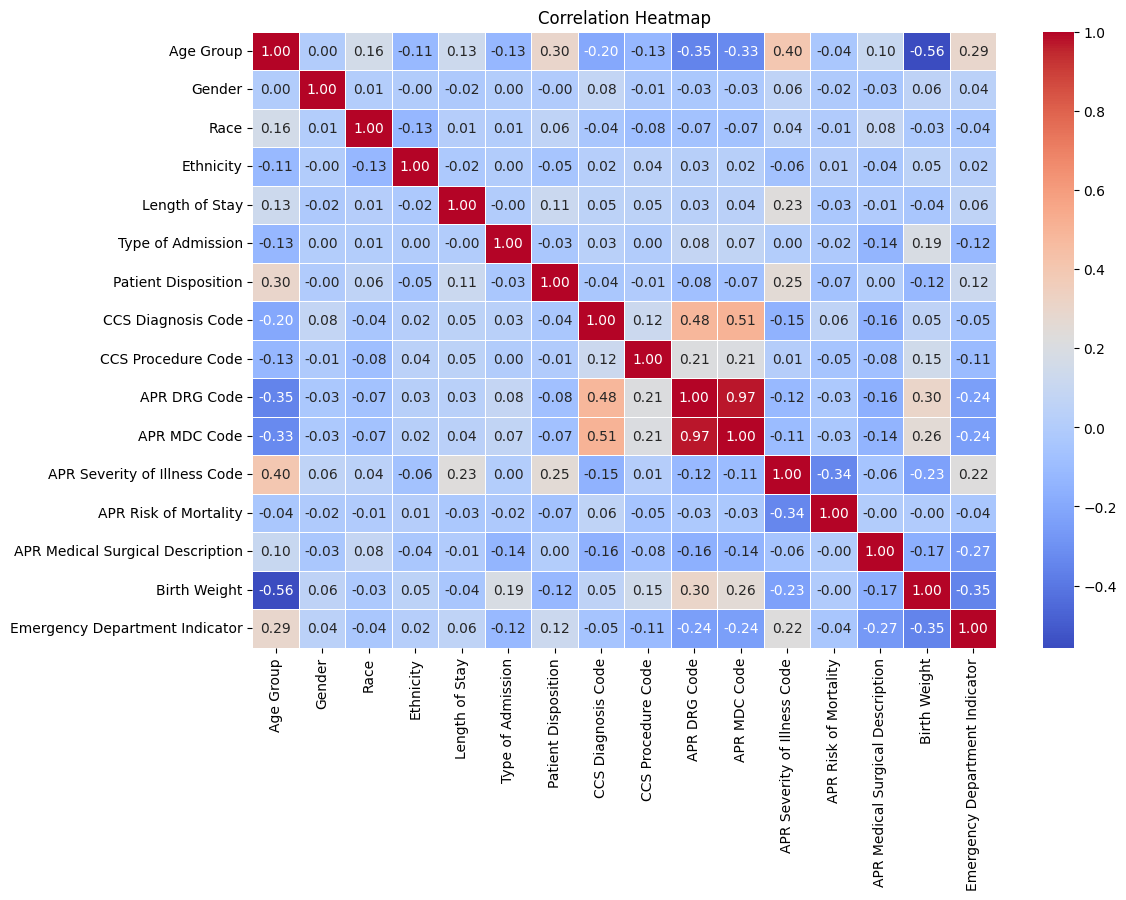

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
data.columns

Index(['Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Birth Weight',
       'Emergency Department Indicator'],
      dtype='object')

In [ ]:
data.dtypes

Age Group                             int64
Gender                                int64
Race                                  int64
Ethnicity                             int64
Length of Stay                        int64
Type of Admission                     int64
Patient Disposition                   int64
CCS Diagnosis Code                  float64
CCS Procedure Code                  float64
APR DRG Code                          int64
APR MDC Code                          int64
APR Severity of Illness Code          int64
APR Risk of Mortality                 int64
APR Medical Surgical Description      int64
Birth Weight                          int64
Emergency Department Indicator        int64
dtype: object

Prediction of APR Risk of Mortality

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
target_col = data['APR Risk of Mortality']

In [ ]:
X = data.drop('APR Risk of Mortality',axis = 1) # features
y = target_col # target


In [ ]:
class_name = ['Extreme','Major','Minor','Moderate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

One vs Rest

In [ ]:
binary_classifiers = {}

In [ ]:
for class_label in np.unique(y_train):
    # Create a binary target variable (1 for the current class, 0 for others)
    y_train_binary = (y_train == class_label).astype(int)

    # Train a binary logistic regression classifier
    model = LogisticRegression()
    model.fit(X_train, y_train_binary)

    # Store the trained binary classifier
    binary_classifiers[class_label] = model


In [ ]:
# Make multiclass predictions
y_pred = np.argmax(np.array([model.predict_proba(X_test)[:, 1] for model in binary_classifiers.values()]).T, axis=1)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.6313
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.34      0.41      5083
           1       0.64      0.73      0.68      4949
           2       0.66      0.66      0.66      4940
           3       0.67      0.80      0.73      5028

    accuracy                           0.63     20000
   macro avg       0.62      0.63      0.62     20000
weighted avg       0.62      0.63      0.62     20000



Text(0.5, 1.0, 'Confusion Matrix')

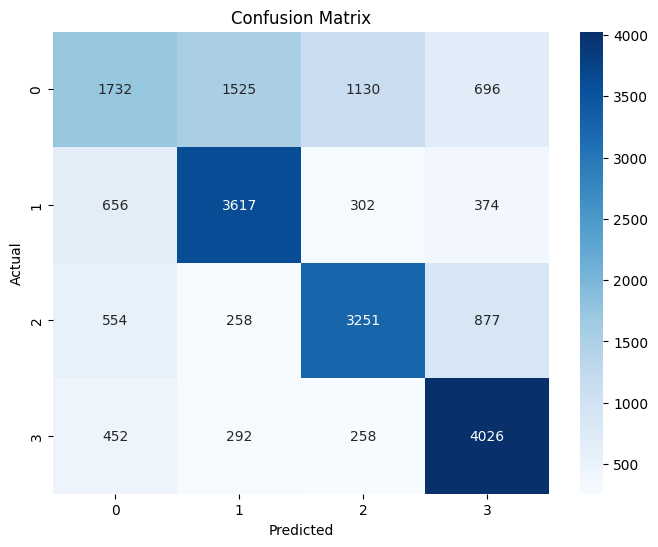

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


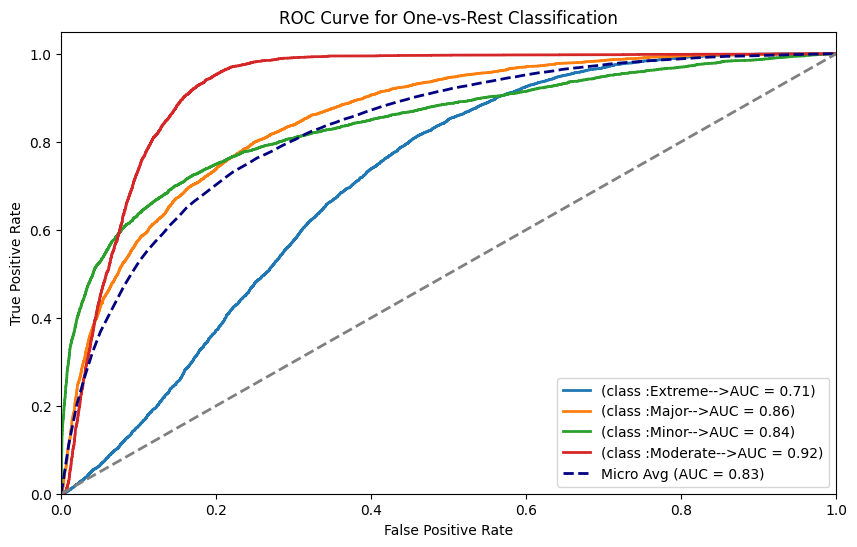

Macro Avg AUC: 0.86


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

# Create a sample multiclass dataset
X, y = make_classification(n_samples=100000, n_features=15, n_informative=5, n_classes=4,n_redundant=3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-class logistic regression classifier (OvR strategy)
classifier = LogisticRegression(solver='lbfgs', multi_class='ovr')

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Create dictionaries to store TPR and FPR for each class
tpr_dict = {}
fpr_dict = {}

# Plot ROC curves for each class and calculate micro/macro AUC
plt.figure(figsize=(10, 6))
all_labels = np.unique(y)

micro_tpr = np.zeros(100)
micro_fpr = np.linspace(0, 1, 100)

for label in all_labels:
    # Get the decision function for the current class
    y_score = classifier.decision_function(X_test)[:, label]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test == label, y_score)

    # Calculate AUC for the class
    roc_auc = auc(fpr, tpr)

    # Store TPR and FPR
    tpr_dict[label] = tpr
    fpr_dict[label] = fpr
    # Plot the ROC curve for the class
    plt.plot(fpr, tpr, lw=2, label= f'(class :{class_name[label]}-->AUC = {roc_auc:.2f})')

    # Calculate micro TPR
    micro_tpr += np.interp(micro_fpr, fpr, tpr)

# Plot the micro-average ROC curve
micro_tpr /= len(all_labels)
micro_auc = auc(micro_fpr, micro_tpr)
plt.plot(micro_fpr, micro_tpr, color='navy', linestyle='--', lw=2, label=f'Micro Avg (AUC = {micro_auc:.2f})')

# Calculate macro-average AUC
macro_auc = roc_auc_score(y_test, classifier.predict_proba(X_test), average='macro',multi_class = 'ovr')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for One-vs-Rest Classification')
plt.legend(loc='lower right')
plt.show()

print(f"Macro Avg AUC: {macro_auc:.2f}")


Multinomial

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Apply dimensionality reduction for visualization (e.g., PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a KMeans clustering model for visualization
kmeans = KMeans(n_clusters=len(np.unique(y_test)))

# Fit KMeans on the reduced feature space
kmeans.fit(X_pca)

# Plot the true and predicted labels
plt.figure(figsize=(10, 6))

# True labels
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_test, palette="viridis", s=50, marker='o')

# Predicted labels
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette="viridis", s=50, marker='x')

plt.title('Cluster Plot for Multiclass Classification')
plt.legend(title='Class')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.7822365863979001
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72     24247
           1       0.55      0.53      0.54     59720
           2       0.89      0.93      0.91    327431
           3       0.58      0.50      0.53    110889

    accuracy                           0.78    522287
   macro avg       0.67      0.68      0.68    522287
weighted avg       0.77      0.78      0.78    522287



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your features (optional but often recommended for K-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a K-NN classifier
k = 200  # You can choose the number of neighbors (k) based on your problem
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the K-NN classifier
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=200)

In [ ]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.7836917250477228
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67     24247
           1       0.55      0.51      0.53     59720
           2       0.88      0.93      0.91    327431
           3       0.58      0.53      0.55    110889

    accuracy                           0.78    522287
   macro avg       0.69      0.64      0.66    522287
weighted avg       0.77      0.78      0.78    522287



Random Forest

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = make_classification(n_samples=100000, n_features=15, n_informative=5, n_classes=4,n_redundant=3, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=400, criterion='gini',max_depth = 25,max_features=8, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict the class labels
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5083
           1       0.91      0.91      0.91      4949
           2       0.91      0.83      0.87      4940
           3       0.89      0.94      0.91      5028

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



Text(0.5, 1.0, 'Confusion Matrix')

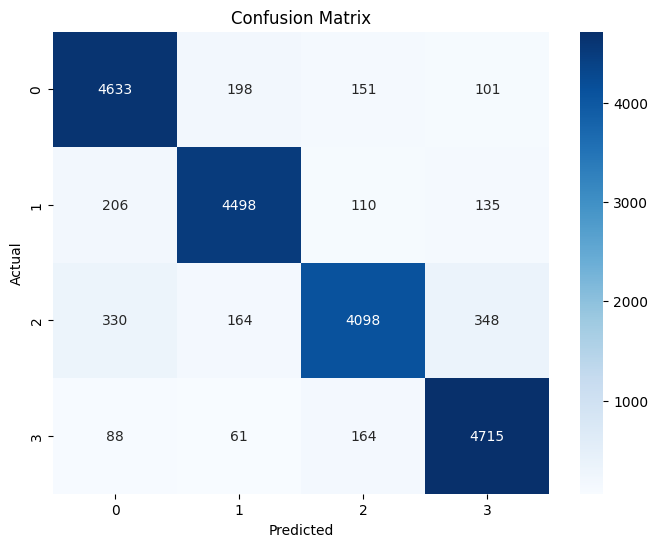

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')